In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [40]:
#source -> World Bank Open Data
world_data = pd.read_csv("/Users/manuelgoncalves/Documents/GitHub/scm-inference-fertility-policies/data/world_data/world_data.csv").drop(['Country Code', 'Indicator Name', 'Indicator Code', '2023', 'Unnamed: 68'],axis=1)

#melt the data to long format for easier plotting
world_data_melted = world_data.melt(
    id_vars=["Country Name"], 
    var_name="Year", 
    value_name="Fertility Rate"
)

# Convert "Year" to numeric for proper sorting
world_data_melted["Year"] = pd.to_numeric(world_data_melted["Year"], errors='coerce')

display(world_data_melted)

,Country Name,Year,Fertility Rate
0,Aruba,1960,4.820000
1,Africa Eastern and Southern,1960,6.723226
2,Afghanistan,1960,7.282000
3,Africa Western and Central,1960,6.459063
4,Angola,1960,6.708000
...,...,...,...
16753,Kosovo,2022,1.510000
16754,"Yemen, Rep.",2022,3.716000
16755,South Africa,2022,2.341000
16756,Zambia,2022,4.242000


In [41]:
germany_data = world_data_melted[world_data_melted['Country Name']=='Germany']
EU_data = world_data_melted[world_data_melted['Country Name']=='European Union']
display(germany_data)

,Country Name,Year,Fertility Rate
55,Germany,1960,2.370
321,Germany,1961,2.450
587,Germany,1962,2.440
853,Germany,1963,2.510
1119,Germany,1964,2.540
...,...,...,...
15483,Germany,2018,1.570
15749,Germany,2019,1.540
16015,Germany,2020,1.530
16281,Germany,2021,1.580


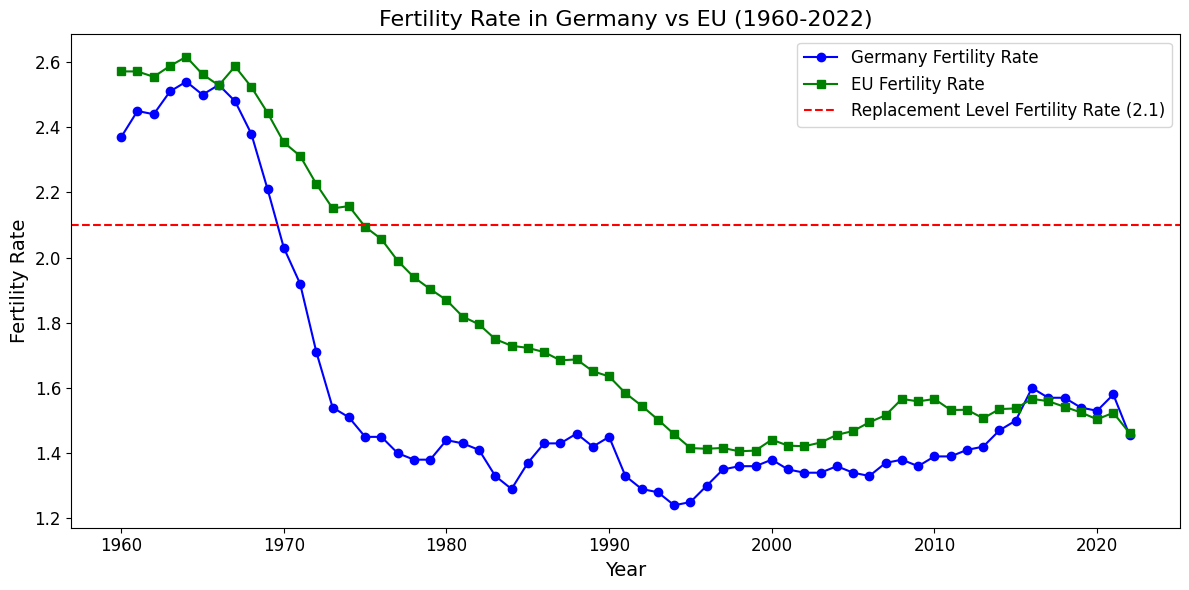

In [42]:
plt.figure(figsize=(12, 6))

# Plot Germany's fertility rate
plt.plot(
    germany_data["Year"],
    germany_data["Fertility Rate"],
    marker="o",
    label="Germany Fertility Rate",
    color="blue"
)

# Plot EU's fertility rate
plt.plot(
    EU_data["Year"],
    EU_data["Fertility Rate"],
    marker="s",
    label="EU Fertility Rate",
    color="green"
)

# Add a dotted line for the replacement level fertility rate (2.1)
plt.axhline(y=2.1, color='red', linestyle='--', label="Replacement Level Fertility Rate (2.1)")

# Customize the plot
plt.title("Fertility Rate in Germany vs EU (1960-2022)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Fertility Rate", fontsize=14)

# Set x-axis ticks every 10 years
plt.xticks(range(1960, 2023, 10), fontsize=12)

# Set y-axis ticks
plt.yticks(fontsize=12)

# Display the legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()